In [2]:
# import packages that will be used for the logistics regression analysis
import pylab
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# import data set that will be used for the logistics regression analysis
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')

# Rename the survey columns
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat',
 'Item3':'Timely_visits','Item4':'Reliability',
 'Item5':'Options','Item6':'Hrs_treat',
 'Item7':'Courteous','Item8':'Active_listen'},inplace=True)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# check if there is any missing data entries. Output should be false.
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [4]:
# drop all the columns we don't need for this analysis
df.drop(['City','State','County','Area','Zip','Lat','Lng','Population','TimeZone','Additional_charges','TotalCharge','Services','Interaction','UID','Customer_id','Job','CaseOrder'],axis = 1,inplace=True)
# verify that all the columns were dropped before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arthr

In [5]:
df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
#Create dummies for Gender and the target variable 
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['ReAdmis_dummy'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]

In [7]:
# convert categorical yes/no values to numeric 1/0 values
df = df.replace(to_replace = ['Yes','No'],value = [1,0])
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen,gender_dummy,ReAdmis_dummy
0,1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,10.585770,3,3,2,2,4,3,3,4,0,0
1,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,15.129562,3,4,3,4,4,4,3,3,1,0
2,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,4.772177,2,4,4,4,3,4,3,3,1,0
3,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,1.714879,3,5,5,3,4,5,5,5,0,0
4,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,1.254807,2,1,3,3,5,3,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,51.561220,3,2,2,3,4,3,4,2,0,0
9996,4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,68.668240,3,3,4,2,5,3,4,4,0,1
9997,3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,70.154180,3,3,3,4,4,2,3,2,1,1
9998,3,43,29702.32,Divorced,Male,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,63.356900,5,5,3,4,4,3,4,3,0,1


In [8]:
# identify the columns for numerical data
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)

Index(['Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'Timely_admis', 'Timely_treat', 'Timely_visits',
       'Reliability', 'Options', 'Hrs_treat', 'Courteous', 'Active_listen',
       'gender_dummy', 'ReAdmis_dummy'],
      dtype='object')


<Figure size 720x1440 with 0 Axes>

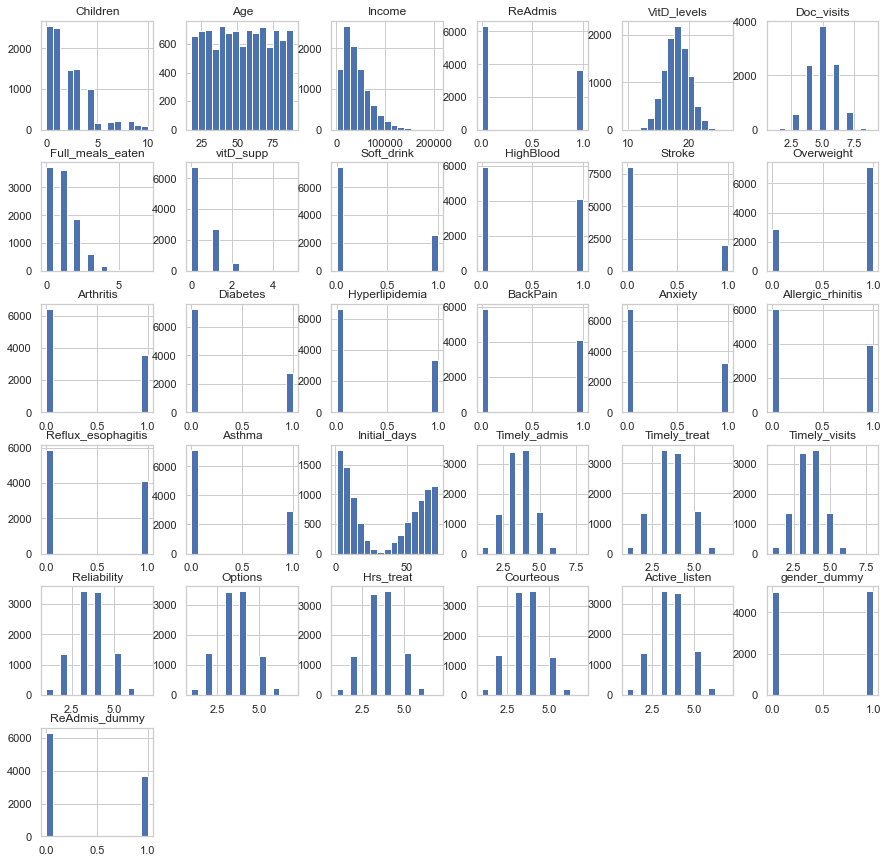

In [9]:
# create histogram plots of the identified numerica data
fig = plt.figure(figsize=(10, 20))
ax = df[NumericalData].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

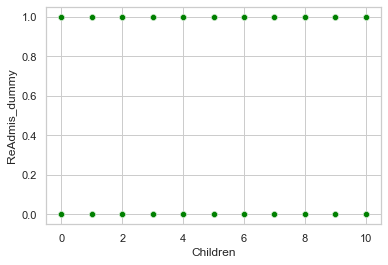

In [10]:
# showcase the bivariate distributions through scatterplots
sb.scatterplot(x=df['Children'], y=df['ReAdmis_dummy'], color='green')
plt.show();

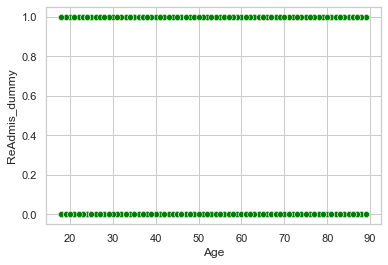

In [11]:
sb.scatterplot(x=df['Age'], y=df['ReAdmis_dummy'], color='green')
plt.show();

In [12]:
# create the initial logistics model
df['Intercept'] = 1
log_reg_results = sm.Logit(df["ReAdmis_dummy"], df[['Children','Age','Income','Doc_visits','Initial_days','gender_dummy','Intercept']]).fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.048760
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          ReAdmis_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.9258
Time:                        12:50:26   Log-Likelihood:                -487.60
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Children         0.0619      0.037      1.675      0.094      -0.011       0.134
Age             -0.000

In [14]:
print (df)

      Children  Age    Income    Marital  Gender  ReAdmis  VitD_levels  \
0            1   53  86575.93   Divorced    Male        0    19.141466   
1            3   51  46805.99    Married  Female        0    18.940352   
2            3   53  14370.14    Widowed  Female        0    18.057507   
3            0   78  39741.49    Married    Male        0    16.576858   
4            1   22   1209.56    Widowed  Female        0    17.439069   
...        ...  ...       ...        ...     ...      ...          ...   
9995         2   25  45967.61    Widowed    Male        0    16.980860   
9996         4   87  14983.02    Widowed    Male        1    18.177020   
9997         3   45  65917.81  Separated  Female        1    17.129070   
9998         3   43  29702.32   Divorced    Male        1    19.910430   
9999         8   70  62682.63  Separated  Female        1    18.388620   

      Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  \
0              6                 0          0     